In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.interpolate import spline
import numpy as np
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

## Environment parameters

CPRG parameters used in the experiment

Parameter | Value
---- | ---
$N_{max}$ | 1000
$r_g$ |  0.5
$\alpha$ | 0.35
$\beta$ | 0.4
$X_{min}$ | 100
$X_{max}$ | 500
$c$ | 0.5

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,center=False).mean()
  del sys.path[0]


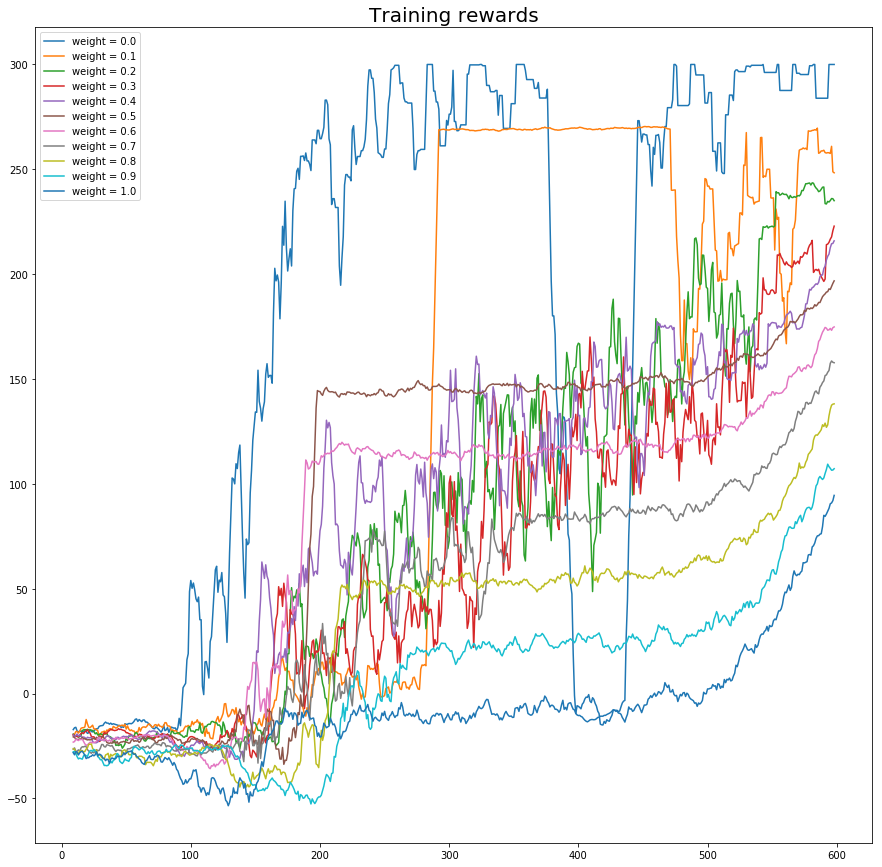

In [2]:
log_dir = "log/agent_model/"
model_list = sorted(os.listdir(log_dir))

fig = plt.figure(num=None, figsize=(15, 15))

legends = []
for dir_name in model_list:
    if dir_name.split('_')[2] == '10':
        file_name = log_dir + dir_name + '/' + 'avg_score.txt'

        df = pd.read_csv(file_name, header=None)
        df.columns = ["r"]
        df = pd.rolling_mean(df, 10)
        plt.plot(df)
        legends.append('weight = ' + dir_name.split('_')[1])

plt.title("Training rewards", fontsize=20)
plt.legend(legends)

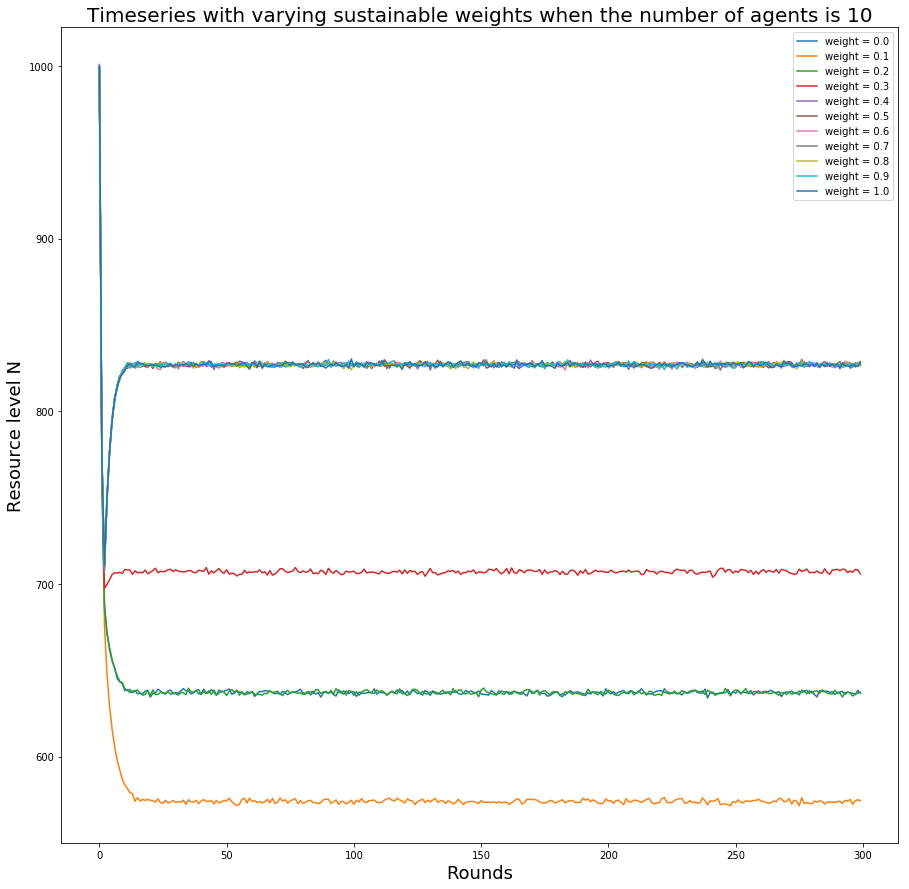

In [3]:
log_dir = "log/agent_model/"
model_list = sorted(os.listdir(log_dir))
fig = plt.figure(num=None, figsize=(15, 15))

legends = []
for dir_name in model_list:
    if dir_name.split('_')[2] == '10':
        file_name = log_dir + dir_name + '/' + 'test_resource_level.txt'
        df = pd.read_csv(file_name, header=None)
        noise = np.random.normal(0, 1, df.shape)
        df += noise
        df.columns = ["r"]
        plt.plot(df)
        legends.append('weight = ' + dir_name.split('_')[1])

plt.title("Timeseries with varying sustainable weights when the number of agents is 10", fontsize=20)
plt.ylabel('Resource level N', fontsize=18)
plt.xlabel('Rounds', fontsize=18)
plt.legend(legends)

In [4]:
log_dir = "log/agent_model/"
model_list = sorted(os.listdir(log_dir))

results_dict = defaultdict(dict)

for dir_name in model_list:
    weight = dir_name.split('_')[1]
    n_agents = dir_name.split('_')[2]

    file_name = log_dir + dir_name + '/' + 'test_resource_level.txt'
    df = pd.read_csv(file_name, header=None)
    df.columns = ["r"]
    results_dict[weight][n_agents] = int(df.iloc[-1:]["r"])

re_level = np.zeros((11, 10), dtype=int)

for index1, weight in enumerate(np.linspace(0.0, 1.0, 11)):
    for index2, n in enumerate(range(1, 11)):
        # print("{0:.1f}".format(weight), str(n))
        re_level[index1][index2] = int(results_dict["{0:.1f}".format(weight)][str(n)])


df = pd.DataFrame(data=re_level, index=np.linspace(0.0, 1.0, 11,dtype=np.float64), columns=range(1, 11))
df.index = df.index.map(lambda x:"{0:.1f}".format(x))

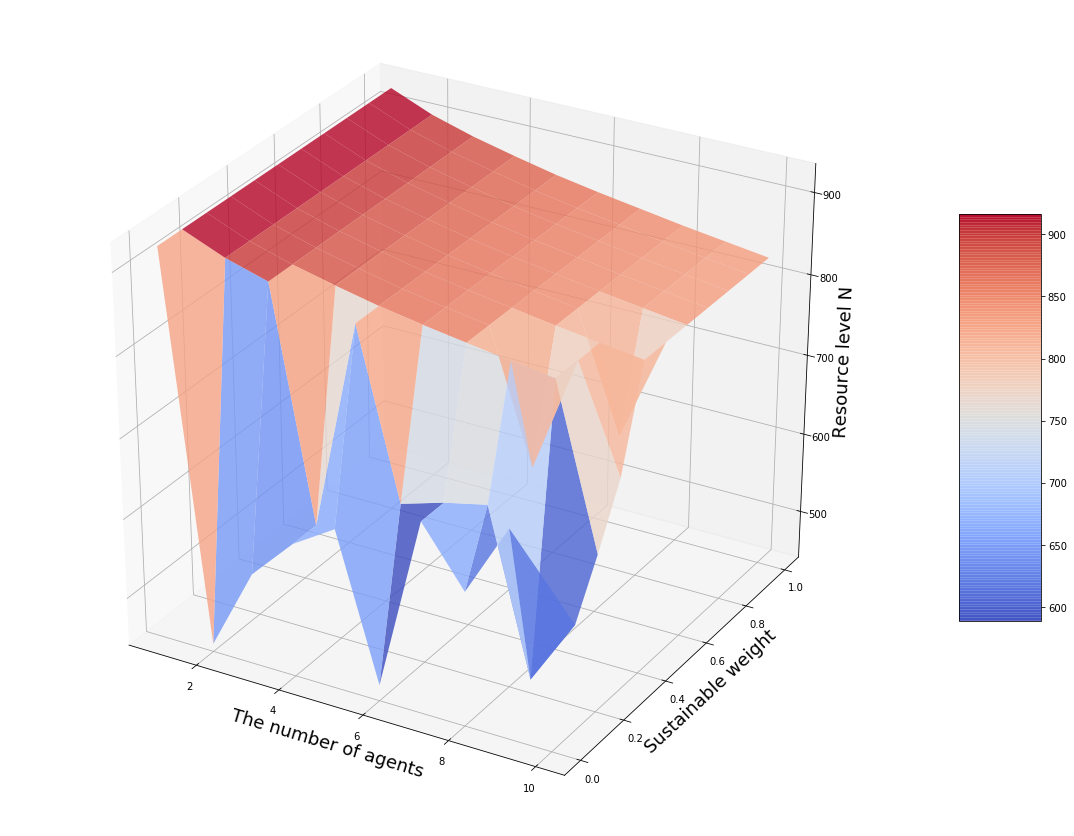

In [5]:
X_plot = np.linspace(0.0, 1.0, 11)
Y_plot = np.arange(1, 11)
X_plot,Y_plot = np.meshgrid(X_plot,Y_plot)
Z_plot = df
fig=plt.figure(figsize=(20,15))
ax = fig.gca(projection='3d')
ax.set_ylabel('Sustainable weight', fontsize=18)
ax.set_xlabel('The number of agents', fontsize=18)
ax.set_zlabel('Resource level N', fontsize=18)
surf = ax.plot_surface(Y_plot, X_plot, Z_plot.T, rstride=1,cstride=1,cmap=cm.coolwarm,alpha=0.8)
fig.colorbar(surf, shrink=0.5, aspect=5)

Text(0.5,1,'Resource level N')

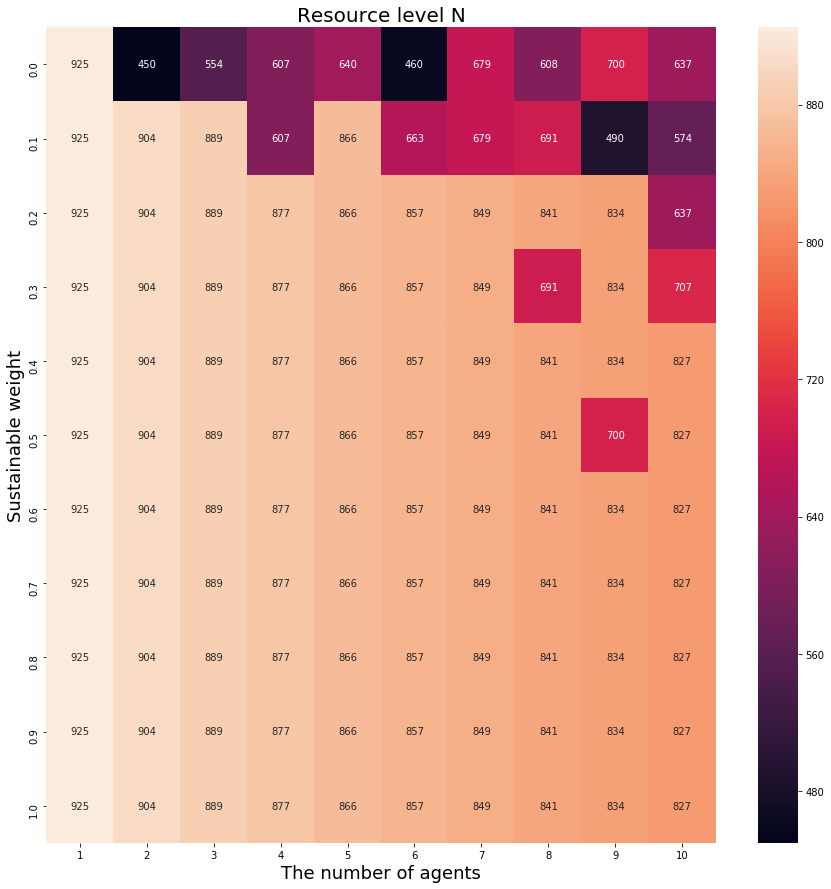

In [6]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(df, annot=True, fmt="d")
plt.ylabel('Sustainable weight', fontsize=18)
plt.xlabel('The number of agents', fontsize=18)
plt.title("Resource level N", fontsize=20)

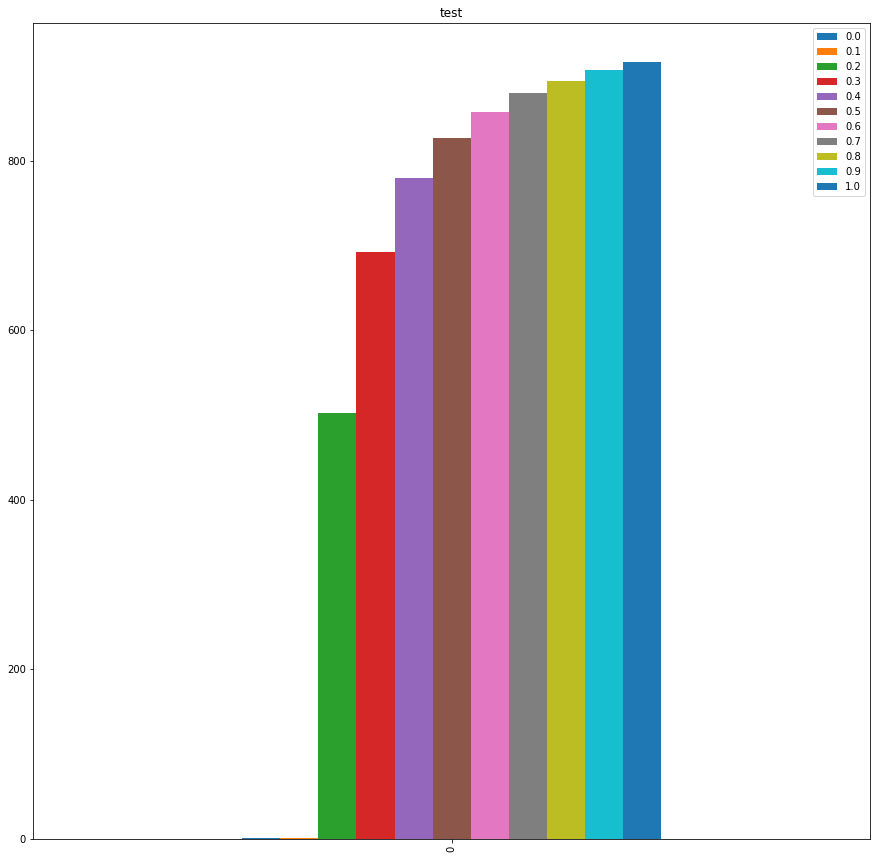

In [43]:
log_dir = "log/agent_model/_0.5_10/"
file_list = sorted(os.listdir(log_dir))[:11]
# fig = plt.figure(num=None, figsize=(15, 15))

re_list = []
legends = []
for dir_name in file_list:
    legends.append(dir_name.split("_")[0])
    file_name = log_dir + dir_name
    df = pd.read_csv(file_name, header=None)
    df.columns = ["r"]
    re_list.append(int(df.iloc[-1:]["r"]))

df = pd.DataFrame(re_list, index=legends)
df.T.plot.bar(figsize=(15, 15), title="Resource level N against replenishment_rate")